In [17]:

import pandas as pd
import numpy as np
from yfinance import base
#from sklearn.linear_model import LinearRegression
#from sklearn.isotonic import IsotonicRegression
#from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_diabetes
#from scipy import linalg
#import ibkrapi as ibk

In [28]:
stock=yf.Ticker('AAPL').info
#plt.plot(stock['Close'])

#stock.to_csv('/home/leox26/Projects/oraculo/datos de entreno/precios.csv')
stock


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [39]:
base.TickerBase("AAPL").stats()


{'defaultKeyStatistics': {'annualHoldingsTurnover': None,
  'enterpriseToRevenue': 6.735,
  'beta3Year': None,
  'profitMargins': 0.25709,
  'enterpriseToEbitda': 20.146,
  '52WeekChange': 0.032831788,
  'morningStarRiskRating': None,
  'forwardEps': 6.46,
  'revenueQuarterlyGrowth': None,
  'sharesOutstanding': 16070800384,
  'fundInceptionDate': None,
  'annualReportExpenseRatio': None,
  'totalAssets': None,
  'bookValue': 3.61,
  'sharesShort': 115400891,
  'sharesPercentSharesOut': 0.0072000003,
  'fundFamily': None,
  'lastFiscalYearEnd': 1632528000,
  'heldPercentInstitutions': 0.59784,
  'netIncomeToCommon': 99632996352,
  'trailingEps': 6.05,
  'lastDividendValue': 0.23,
  'SandP52WeekChange': -0.103508174,
  'priceToBook': 43.592796,
  'heldPercentInsiders': 0.00068999996,
  'nextFiscalYearEnd': 1695600000,
  'yield': None,
  'mostRecentQuarter': 1656115200,
  'shortRatio': 1.69,
  'sharesShortPreviousMonthDate': 1657843200,
  'floatShares': 16054038418,
  'beta': 1.230174,
 

In [37]:

y=stock['Close'].values
x=np.arange(1,538)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,train_size=0.5,random_state=0)

In [38]:
clf=LinearRegression()
clf.fit(x_train.reshape(x_train.size,1),y_train.reshape(y_train.size,1))
predict_=clf.predict(x_test.reshape(x_test.size,1))
print(clf.score(x_train.reshape(x_train.size,1),y_train.reshape(y_train.size,1)))

0.9110487259124134


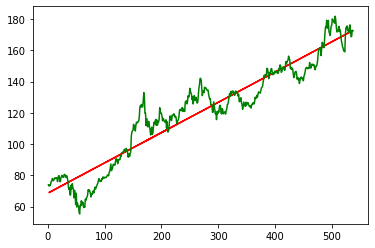

In [44]:
fig=plt.plot(x_test,predict_,color='red')
plt.plot(x,y,color='green')


ValueError: x and y must be the same size

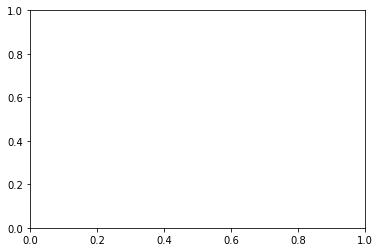

In [13]:
import math
intervalo=stock-stock.shift(1)
stock['Close'].std()/math.sqrt(intervalo['Close'].mean())
class indicadores:
 def log_xVO(price): #volatilidad de parkinson con transformaciones de cierre y apertura
  dm=[]
  for i in range(1,price.index.size+1):
    dm.append(i)
  nm=1/2*np.log(price['High']/price['Low'])**2+2*np.log(2)-1*np.log(price['Close']/price['Open'])**2
  vlt=nm/dm
  return np.sqrt(vlt)

 def log_parkinson(precio): #volatilidad de parkinson
  n=[]
  for i in range(1,stock.index.size+1):
     n.append(i)
  nm=np.sqrt(1/np.array(n)*np.log(precio['High']/precio['Low'])**2)
  dm=np.sqrt(4*np.log(2))
  return nm/dm 
 def log_return(price): # rentabilidad logaritmica
     return np.log(price['Close']/price['Close'].shift(1))

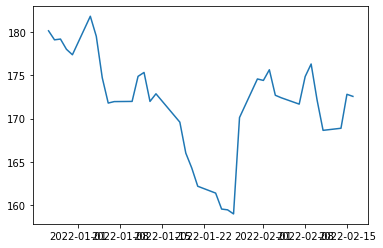

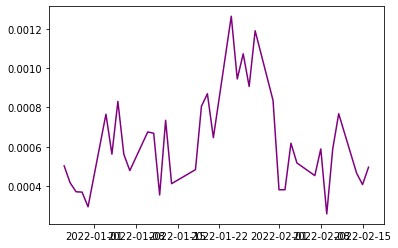

In [14]:

fig=plt.plot(stock['Close'][500:])
plt.show(fig)
t=indicadores.log_parkinson(stock)[500:]
plt.plot(t,color='purple')